# Pywavelets

Notebook to explore the use of Pywavelets for CWT of evenly-spaced data.

In [6]:
import pywt
import pyleoclim as pyleo
import numpy as np

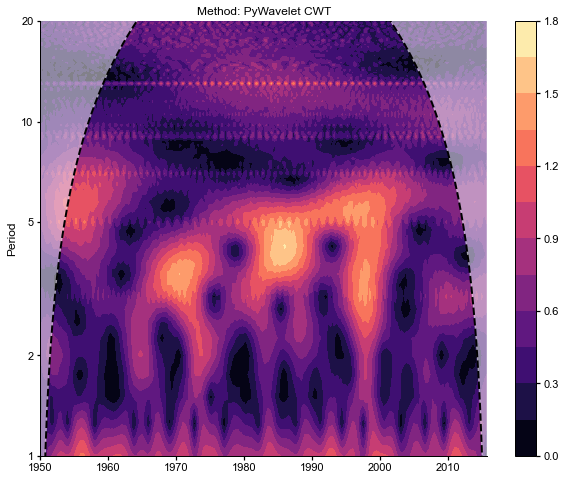

In [3]:
time, sst = pywt.data.nino()
dt = time[1] - time[0]

# Taken from http://nicolasfauchereau.github.io/climatecode/posts/wavelet-analysis-in-python/
wavelet = 'cmor1.5-1.0'
scales = np.arange(1, 128) # magic?

[cfs, frequencies] = pywt.cwt(sst, scales, wavelet, dt)
power = (abs(cfs)) ** 2
amplitude = (abs(cfs)) #this is what is returned by TP and WWZ in Pyleoclim

scal_pwt = pyleo.Scalogram(frequencies, time, amplitude.T)
fig, ax = scal_pwt.plot(mute=True)
ax.set_ylim([1, 20])
ax.set_title('Method: PyWavelet CWT')
pyleo.showfig(fig)
pyleo.closefig()

Use Torrence and Compo Data

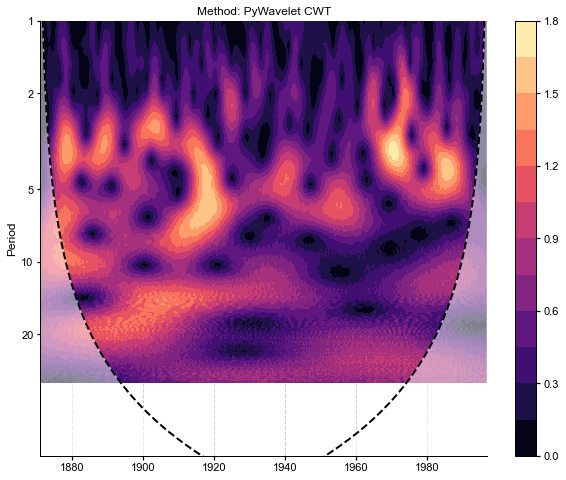

In [4]:
sst = np.loadtxt('sst_nino3.dat')
dt = 0.25
time = np.arange(len(sst)) * dt + 1871.0

wavelet = 'cmor1.5-1.0'
scales = np.arange(1, 128) # magic?

[cfs, frequencies] = pywt.cwt(sst, scales, wavelet, dt)
power = (abs(cfs)) ** 2
amplitude = (abs(cfs)) #this is what is returned by TP and WWZ in Pyleoclim

scal_pwt = pyleo.Scalogram(frequencies, time, amplitude.T)
fig, ax = scal_pwt.plot(mute=True)
ax.set_ylim([1, 64])
ax.set_title('Method: PyWavelet CWT')
ax.invert_yaxis()
pyleo.showfig(fig)
pyleo.closefig()

Try with power

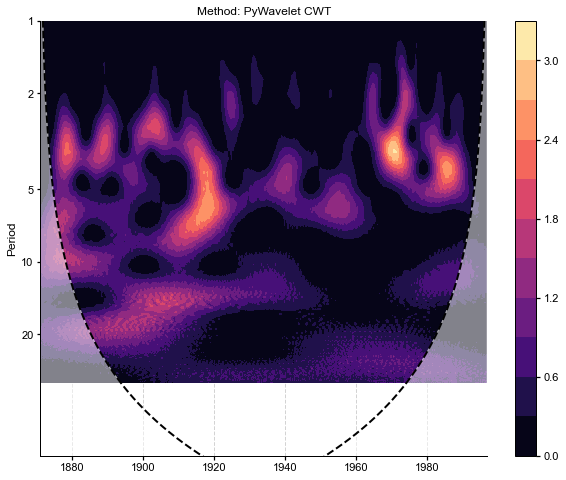

In [5]:
scal_pwt = pyleo.Scalogram(frequencies, time, power.T)
fig, ax = scal_pwt.plot(mute=True)
ax.set_ylim([1, 64])
ax.set_title('Method: PyWavelet CWT')
ax.invert_yaxis()
pyleo.showfig(fig)
pyleo.closefig()

In [17]:
scales

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127])

Use the way the scale vector is obtained in Torrence and Compo to make this work

In [19]:
s0 = 2*dt #smallest scale is twice the spacing between adjacent point
dj = 1. / 4. #the spacing between discrete scales.
J1 = np.fix((np.log(len(sst) * dt / s0) / np.log(2)) / dj) #number of scales -1
j = np.arange(0, J1 + 1)
scale = s0 * 2. ** (j * dj)
scale

array([  0.5       ,   0.59460356,   0.70710678,   0.84089642,
         1.        ,   1.18920712,   1.41421356,   1.68179283,
         2.        ,   2.37841423,   2.82842712,   3.36358566,
         4.        ,   4.75682846,   5.65685425,   6.72717132,
         8.        ,   9.51365692,  11.3137085 ,  13.45434264,
        16.        ,  19.02731384,  22.627417  ,  26.90868529,
        32.        ,  38.05462768,  45.254834  ,  53.81737058,
        64.        ,  76.10925536,  90.50966799, 107.63474115])

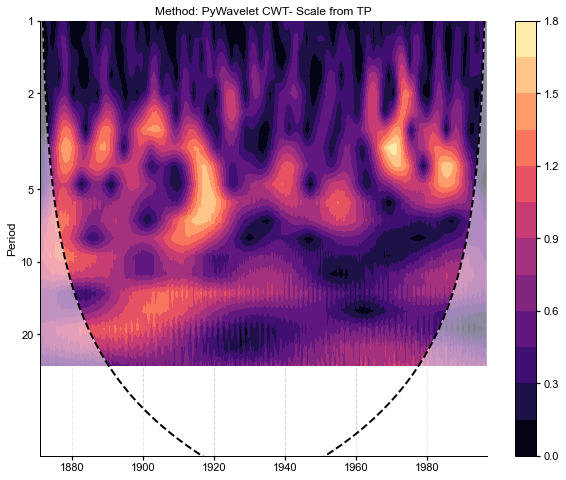

In [20]:
wavelet = 'cmor1.5-1.0'

[cfs, frequencies] = pywt.cwt(sst, scale, wavelet, dt)
power = (abs(cfs)) ** 2
amplitude = (abs(cfs)) #this is what is returned by TP and WWZ in Pyleoclim

scal_pwt = pyleo.Scalogram(frequencies, time, amplitude.T)
fig, ax = scal_pwt.plot(mute=True)
ax.set_ylim([1, 64])
ax.set_title('Method: PyWavelet CWT- Scale from TP')
ax.invert_yaxis()
pyleo.showfig(fig)
pyleo.closefig()

Comparison to WWZ

In [31]:
ts = pyleo.Series(time=time,value=sst)

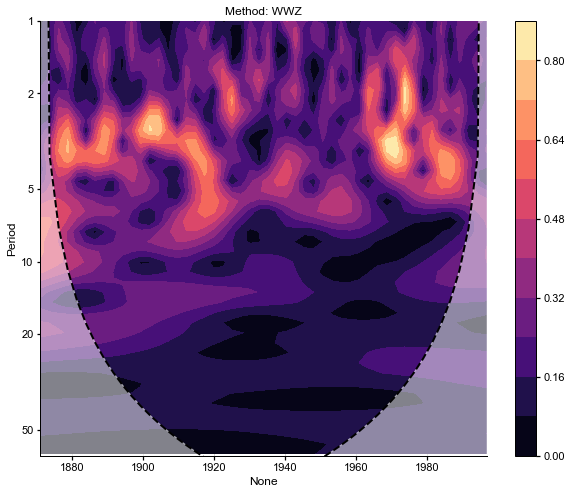

In [32]:
scal=ts.wavelet()
fig, ax = scal.plot()
ax.set_ylim([1, 64])
ax.set_title('Method: WWZ')
ax.invert_yaxis()
pyleo.showfig(fig)
pyleo.closefig()

Using the frequency methods available in Pyleoclim

In [7]:
freq_log = pyleo.utils.wavelet.make_freq_vector(time,method='log')
freq_ls = pyleo.utils.wavelet.make_freq_vector(time,method='lomb_scargle')
freq_welch = pyleo.utils.wavelet.make_freq_vector(time,method='welch')
freq_nfft = pyleo.utils.wavelet.make_freq_vector(time,method='nfft')
freq_scale = pyleo.utils.wavelet.make_freq_vector(time,method='scale')

freq_label = ['log','lomb_scargle','welch','nfft','scale']
freq = [freq_log, freq_ls, freq_welch,freq_nfft,freq_scale]

Get scale vector

In [8]:
scale = []
param = 6
fourier_factor = 4 * np.pi / (param + np.sqrt(2 + param**2))
for item in freq:
    scale.append(1. / (fourier_factor * item))

/var/folders/xj/p7h9764x7cx0by8547l04rrr0000gn/T/ipykernel_13600/2518210956.py:5: RuntimeWarning: divide by zero encountered in true_divide
  scale.append(1. / (fourier_factor * item))


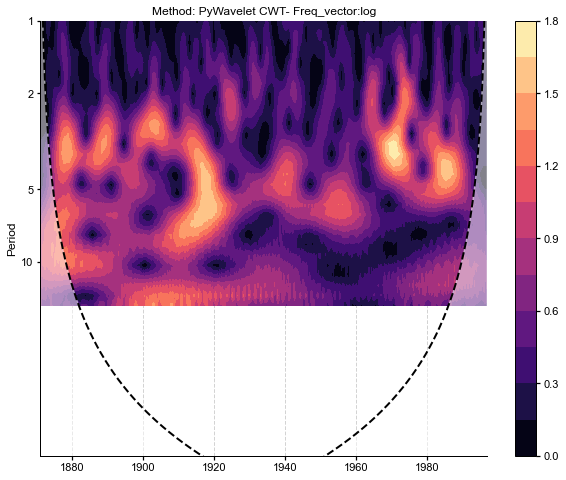

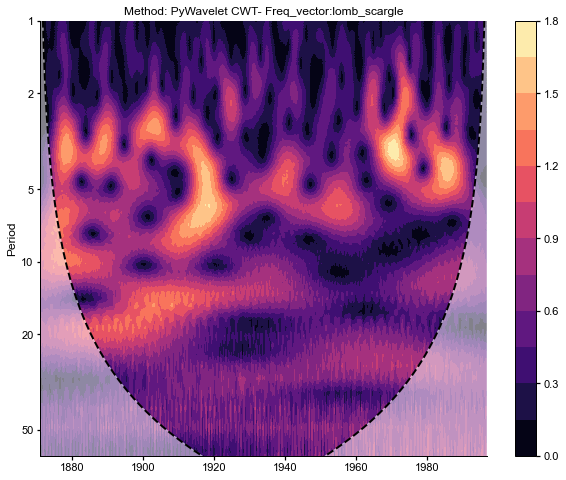

Method returns error with chosen freq vector
Method returns error with chosen freq vector


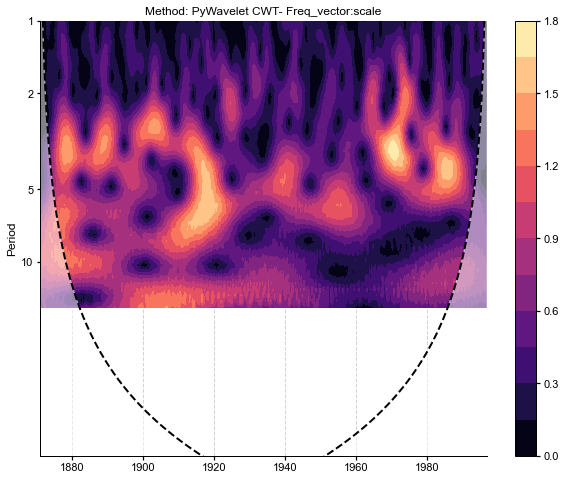

In [9]:
#computer and plot

for idx, item in enumerate(scale):
    try:
        [cfs, frequencies] = pywt.cwt(sst, item, wavelet, dt)
        amplitude = (abs(cfs)) #this is what is returned by TP and WWZ in Pyleoclim

        scal_pwt = pyleo.Scalogram(frequencies, time, amplitude.T)
        fig, ax = scal_pwt.plot(mute=True)
        ax.set_ylim([1, 64])
        ax.set_title('Method: PyWavelet CWT- Freq_vector:'+freq_label[idx])
        ax.invert_yaxis()
        pyleo.showfig(fig)
        pyleo.closefig()
    except:
        print('Method returns error with chosen freq vector')